In [1]:
# !pip install pytorch-lightning
# !pip install transformers
# !pip install vncorenlp

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

In [3]:
!nvidia-smi

Thu Apr 21 11:26:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:5E:00.0 Off |                  N/A |
|  0%   25C    P8     1W / 250W |      3MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:86:00.0 Off |                  N/A |
|  0%   

In [4]:
# !kill -9 3980682

In [5]:
import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np
import zipfile
from PIL import Image
import matplotlib.pyplot as plt
import re
import pytorch_lightning as pl
from torchvision import transforms as T
from sklearn.model_selection import train_test_split

train_ratio = 0.8

/home/nghiatl/anaconda3/envs/AI_DA/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import random

# SEED_VALUE = random.randint(0,100)
SEED_VALUE = 84
# print(SEED_VALUE)
random.seed(SEED_VALUE)
torch.manual_seed(SEED_VALUE)
torch.cuda.manual_seed(SEED_VALUE)
np.random.seed(SEED_VALUE)

In [7]:
# %cd /content/drive/MyDrive/Colab Notebooks/Multimodal

In [8]:
# !ls
data_zip_file = './local1_folder.zip'
bin_zip_file = './archive.zip'

csv_file2 = './OUTPUT/Comment_22.csv'
csv_file3 = './OUTPUT/Comment_23.csv'
csv_file4 = './OUTPUT/Comment_24.csv'
csv_file5 = './OUTPUT/Comment_25.csv'

csv_file = './OUTPUT/Comment.csv'

In [9]:
!nvidia-smi

Thu Apr 21 11:26:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:5E:00.0 Off |                  N/A |
|  0%   25C    P8     1W / 250W |      3MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:86:00.0 Off |                  N/A |
|  0%   

# Data preprocessing

## Image data

In [10]:
data_zip = zipfile.ZipFile(data_zip_file)

In [11]:
bin_zip = zipfile.ZipFile(bin_zip_file)

In [12]:
len(bin_zip.namelist())

5999

In [13]:
bin_zip.namelist()[6]

'archive/mountain-peaks/mountain-peaks_000349.png'

In [14]:
'archive/mountain-peaks/mountain-peaks_000472.png' in bin_zip.namelist()

True

In [15]:
len(data_zip.namelist())

58766

In [16]:
'local1_folder-1/foody-fukunohana-hanoi-japanese-retstaurant-970-637197316556573205.jpg' in data_zip.namelist()

True

local1_folder-1/foody-fukunohana-hanoi-japanese-retstaurant-970-637197316556573205.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x734 at 0x7FD54DE01240>
(734, 800, 3)


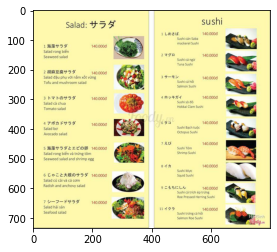

In [17]:
img_path = data_zip.namelist()[1]
print(img_path)
img = Image.open(data_zip.open(img_path))
print(img)
print(np.asarray(img).shape)
plt.imshow(img)

archive/mountain-peaks/mountain-peaks_000472.png
<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x255 at 0x7FD578FA20B0>
(255, 500, 3)


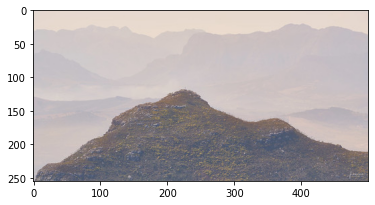

In [18]:
# img_path = bin_zip.namelist()[13]
img_path = 'archive/mountain-peaks/mountain-peaks_000472.png'

print(img_path)
img = Image.open(bin_zip.open(img_path))
print(type(img))
print(img)
print(np.asarray(img).shape)
plt.imshow(img)

In [19]:
# ### Scale image to [0,1]
# trans = T.ToTensor()
# trans(img).shape

## CSV data

In [20]:
data_df1 = pd.read_csv(csv_file)
data_df2 = pd.read_csv(csv_file2)
data_df3 = pd.read_csv(csv_file3)
data_df4 = pd.read_csv(csv_file4)
data_df5 = pd.read_csv(csv_file5)

data_df1[['Comment', 'Rating']].head()

Comment  Rating
0  ƒê·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p d...     5.8
1  D·ªìi kh√° ngon, mua v·ªÅ c√≤n n√≥ng m·ªü ra th∆°m ph·ª©c,...     9.0
2  ƒê·∫∑t xu·∫•t m·ª≥ tr·ªôn th·∫≠p c·∫©m, kh√° ƒë·∫ßy ƒë·ªß v√† ƒë·∫ßy ƒë...     9.4
3  Kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7.9 lu√¥n. ƒê·∫∑t b√°n...     4.6
4  D·ªìi s·ª•n b√© t·∫πo, gi√° qu√° cao so v·ªõi c√°c qu√°n kh...     1.0

In [21]:
data_df4.shape

(3093, 11)

In [22]:
data_df4

RevId    UserId    ResId  \
0     4354468  18302878  1013381   
1     3007299   9291597   859819   
2     3573047  14176887   959528   
3     6451930   8439488   959528   
4     2521478  12153184   795394   
...       ...       ...      ...   
3088    62766    116623    67475   
3089    62262    114375    67475   
3090  2573700  14671922   714125   
3091  8801826   8596308    30377   
3092  2027867   9671065   714125   

                                                Comment  \
0     M·ªôt th·ªùi qu√°n s·ªët s√¨nh s·ªãch tr√™n c√°c di·ªÖn ƒë√†n ...   
1     ƒê√¢y l√† l·∫ßn ƒë·∫ßu ti√™n m√¨nh ƒÉn ·ªü qu√°n papa's kitc...   
2     M√¨nh l√† ng r·∫•t hay ƒëi ƒÉn net hue. Nh∆∞ng ph·∫£i n...   
3     M√¨nh g·ªçi 1 b√°nh b√®o l·∫´n, 1 nem l·ª•i, 1 h·∫øn x√∫c ...   
4     Qu√°n c√≥ kh√¥ng gian v·ª´a ph·∫£i, s·∫°ch s·∫Ω tho√°ng m√°...   
...                                                 ...   
3088  Nh√† h√†ng kh√° ƒë·∫πp v√† sang tr·ªçng. Thi·∫øt k·∫ø v√† tr...   
3089  Nh√† h√†ng sang tr·ªçng, kh√¥ng gian ƒë·∫πp m√† gi√° ƒë·ªì ...   
3090  Ch√® S·∫ßu Li√™n - ƒê√† N·∫µng üò±\nNgo√†i nh·ªØng m√≥n nh∆∞ ...   
3091  ƒêi Nh·∫≠t v·ªÅ th√®m ƒÉn b√°t Ramen n√™n th·ª≠ v√†o Totoc...   
3092  M√¨nh r·∫•t th√≠ch ƒÉn s·ªØa chua m√≠t v√† c√°c lo·∫°i th·∫°...   

                                             image_urls  Food_score_cmt  \
0     https://images.foody.vn/res/g102/1013381/s800/...              10   
1     https://images.foody.vn/res/g86/859819/s800/fo...              10   
2     https://images.foody.vn/res/g96/959528/s800/fo...               3   
3     https://images.foody.vn/res/g96/959528/s800/fo...               7   
4     https://images.foody.vn/res/g80/795394/s800/fo...               9   
...                                                 ...             ...   
3088  https://images.foody.vn/res/g7/67475/s800/food...               8   
3089  https://images.foody.vn/res/g7/67475/s800/food...               7   
3090  https://images.foody.vn/res/g72/714125/s800/fo...              10   
3091  https://images.foody.vn/res/g4/30377/s800/food...               1   
3092  https://images.foody.vn/res/g72/714125/s800/fo...               8   

      Services_score_cmt  Atmosphere_score_cmt  Position_score_cmt  \
0                      9                     8                   9   
1                     10                     9                   8   
2                      1                     5                   4   
3                      7                     7                   7   
4                     10                     9                  10   
...                  ...                   ...                 ...   
3088                   8                     8                   7   
3089                   8                     8                   8   
3090                   9                     5                   5   
3091                   2                     2                   1   
3092                   8                     7                   7   

      Price_score_cmt  Rating  
0                   9     9.0  
1                  10     9.4  
2                   4     3.4  
3                   7     7.0  
4                  10     9.6  
...               ...     ...  
3088                7     7.6  
3089                8     7.8  
3090               10     7.8  
3091                1     1.4  
3092                8     7.6  

[3093 rows x 11 columns]

In [23]:
# def insert_bin_image(df):
#     sample_df = df.sample(frac=0.05, random_state=0)
#     df.drop(sample_df.index, inplace=True)
#     df = df.reset_index(drop=True)
#     sample_df = sample_df.reset_index(drop=True)
#     for i in range(len(sample_df)):
#         list_img = []
#         for j in range(len(sample_df.iloc[i]['image_urls'].split(','))):
#             num_ran = random.randint(0, 900)
#             num_img = '0'* (6-len(str(num_ran))) + str(num_ran)
# #             mountains/mountains_000580.png
#             list_img.append('mountains/mountains_'+ num_img + '.png')
#         sample_df.loc[i,'image_urls'] = ','.join(list_img)
    
#     df = pd.concat([df, sample_df], ignore_index = True)
    
#     return df

# data_df4 = insert_bin_image(data_df4)
# data_df4

In [24]:
data_df = pd.concat([data_df1,data_df2,data_df3,data_df4, data_df5], ignore_index = True)

In [25]:
data_df.shape

(14174, 11)

In [26]:
data_df = data_df.dropna()
data_df = data_df.reset_index(drop=True)

In [27]:
data_df.isnull().sum()

RevId                   0
UserId                  0
ResId                   0
Comment                 0
image_urls              0
Food_score_cmt          0
Services_score_cmt      0
Atmosphere_score_cmt    0
Position_score_cmt      0
Price_score_cmt         0
Rating                  0
dtype: int64

In [28]:
## Add more data
data_df.rename(columns={"Rating":"score"}, inplace=True)
data_df.head()

RevId    UserId   ResId  \
0  3648046   8920424  965165   
1  3695359  18558601  965165   
2  3695487  13885433  965165   
3  4256913  11400976  965165   
4  4246644    525112  965165   

                                             Comment  \
0  ƒê·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p d...   
1  D·ªìi kh√° ngon, mua v·ªÅ c√≤n n√≥ng m·ªü ra th∆°m ph·ª©c,...   
2  ƒê·∫∑t xu·∫•t m·ª≥ tr·ªôn th·∫≠p c·∫©m, kh√° ƒë·∫ßy ƒë·ªß v√† ƒë·∫ßy ƒë...   
3  Kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7.9 lu√¥n. ƒê·∫∑t b√°n...   
4  D·ªìi s·ª•n b√© t·∫πo, gi√° qu√° cao so v·ªõi c√°c qu√°n kh...   

                                          image_urls  Food_score_cmt  \
0  https://images.foody.vn/res/g97/965165/s800/fo...             5.0   
1  https://images.foody.vn/res/g97/965165/s800/fo...            10.0   
2  https://images.foody.vn/res/g97/965165/s800/fo...            10.0   
3  https://images.foody.vn/res/g97/965165/s800/fo...             1.0   
4  https://images.foody.vn/res/g97/965165/s800/fo...             1.0   

   Services_score_cmt  Atmosphere_score_cmt  Position_score_cmt  \
0                 9.0                   5.0                 5.0   
1                10.0                   9.0                 8.0   
2                10.0                   9.0                 8.0   
3                 5.0                   5.0                 6.0   
4                 1.0                   1.0                 1.0   

   Price_score_cmt  score  
0              5.0    5.8  
1              8.0    9.0  
2             10.0    9.4  
3              6.0    4.6  
4              1.0    1.0

In [29]:
data_df['image_urls'][0]

'https://images.foody.vn/res/g97/965165/s800/foody-doi-sun-pate-shop-online-389-637116772226077520.jpg,https://images.foody.vn/res/g97/965165/s800/foody-doi-sun-pate-shop-online-427-637116772199356351.jpg'

In [30]:
# ## Calculate score
# data_df['score'] = data_df.apply(lambda x: (x['Food_score_cmt']+x['Services_score_cmt']+x['Atmosphere_score_cmt']+x['Position_score_cmt']+x['Price_score_cmt'])/5, axis = 1)
data_df[(data_df['score'] >= 8) & (data_df['score'] <= 8)][['Comment','score']].sort_values(by=['score'])

Comment  score
8      Gi·ªØa c√°i th·ªùi ti·∫øt HN s·ªõm tr∆∞a m∆∞a n·∫Øng th·∫•t t...    8.0
9677   S√°ng n√†o m√¨nh cx ph·∫£i ƒÉn ph·ªü ·ªü ƒë√¢y ms ch·ªãu ƒëc ...    8.0
9701   H√†ng x√¥i t·∫•p n·∫≠p ng∆∞·ªùi gh√© ƒÉn & mua mang ƒëi, n...    8.0
9705   Qu√°n ch√® nh·ªè nh·ªè, ƒë·ªëi di·ªán bakery Tati. C√¥ ch·ªß...    8.0
9713   ‚ù§ V·ªã tr√≠ : h√†ng n√†y m·ªõi m·ªü d·∫°o g·∫ßn ƒë√¢y. N·∫±m ng...    8.0
...                                                  ...    ...
4892   * m√πa d·ªãch ƒÉn g√¨ ??ü§îü§î\nƒêang m√πa d·ªãch th·∫ø n√†y c...    8.0
4907                Su·∫•t ƒë·∫∑c bi·ªát c∆°m g√† + s∆∞·ªùn ship Now    8.0
4955   Ch√® s·∫ßu ch√≠nh h√£ng n√® c·∫£ nh√† üòª vi√™m h·ªçng m√† v·∫´...    8.0
5034   Nh√¢n ng√†y xe bus h·ªèng ƒë√∫ng qu√°n ding tea, m√¨nh...    8.0
14161  V√¥ t√¨nh th·∫•y qu√°n ·ªü ngay m·∫∑t ƒë∆∞·ªùng, s·∫°ch s·∫Ω n·ªï...    8.0

[860 rows x 2 columns]

In [31]:
data_df['Comment'][8]

'Gi·ªØa c√°i th·ªùi ti·∫øt HN s·ªõm tr∆∞a m∆∞a n·∫Øng th·∫•t th∆∞·ªùng, t·ªëi ph·∫ßn ph·∫≠t gi√≥ nh∆∞ n√†y th√¨ vi·ªác ng·ªìi nh√¢m nh√¢m nhi nhi em caramen hoa qu·∫£ n√†y l√† 1 ƒëi·ªÅu th·∫≠t tuy·ªát - th∆°m th∆°m ng·∫≠y ng·∫≠y c·ªßa caramen, v·ªã thanh m√°t c·ªßa c√°c lo·∫°i hoa qu·∫£: d∆∞a h·∫•u, xo√†i, thanh long, m√≠t....ƒë∆∞·ª£c k·∫øt h·ª£p l·∫°i v·ªõi nhau r·∫•t th√∫ v·ªã, c·ªëc c√≤n r·∫•t l√† ƒë·∫ßy ƒë·∫∑n n·ªØa ch·ª©. C∆° m√† anh ch·ªã ch·ªß qu√°n l√†m ngon qu√° ƒëi, c·ª© b·ªã nghi·ªán √Ω, m·ªói ng√†y s·∫Ω n·∫øm 1 v·ªã: s·ªØa chua th·∫°ch l√° n·∫øp n√®, sc hoa qu·∫£, ch√® khoai d·∫ªo n√®.....chu choa v.v.....v√¢n v√¢n v√† m√¢y m√¢y...'

In [32]:
## label data
def label_comment(x):
  if x['score'] >= 8:
    return 1
  elif (x['score'] >= 6) & (x['score'] < 8):
    return 2
  else:
    return 0
data_df['label'] = data_df.apply(label_comment, axis=1)

In [33]:
data_df = data_df[data_df['label'] != 2]

1    6953
0    3023
Name: label, dtype: int64


<AxesSubplot:>

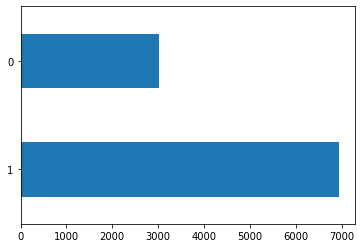

In [34]:
print(data_df['label'].value_counts())
data_df['label'].value_counts().plot(kind='barh')

In [35]:
data_df[['Comment','label', 'score']].head()

Comment  label  score
0  ƒê·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p d...      0    5.8
1  D·ªìi kh√° ngon, mua v·ªÅ c√≤n n√≥ng m·ªü ra th∆°m ph·ª©c,...      1    9.0
2  ƒê·∫∑t xu·∫•t m·ª≥ tr·ªôn th·∫≠p c·∫©m, kh√° ƒë·∫ßy ƒë·ªß v√† ƒë·∫ßy ƒë...      1    9.4
3  Kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7.9 lu√¥n. ƒê·∫∑t b√°n...      0    4.6
4  D·ªìi s·ª•n b√© t·∫πo, gi√° qu√° cao so v·ªõi c√°c qu√°n kh...      0    1.0

In [36]:
data_df = data_df.drop(['Food_score_cmt','Services_score_cmt','Atmosphere_score_cmt','Position_score_cmt','Price_score_cmt'],axis=1)
data_df.head()

RevId    UserId   ResId  \
0  3648046   8920424  965165   
1  3695359  18558601  965165   
2  3695487  13885433  965165   
3  4256913  11400976  965165   
4  4246644    525112  965165   

                                             Comment  \
0  ƒê·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p d...   
1  D·ªìi kh√° ngon, mua v·ªÅ c√≤n n√≥ng m·ªü ra th∆°m ph·ª©c,...   
2  ƒê·∫∑t xu·∫•t m·ª≥ tr·ªôn th·∫≠p c·∫©m, kh√° ƒë·∫ßy ƒë·ªß v√† ƒë·∫ßy ƒë...   
3  Kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7.9 lu√¥n. ƒê·∫∑t b√°n...   
4  D·ªìi s·ª•n b√© t·∫πo, gi√° qu√° cao so v·ªõi c√°c qu√°n kh...   

                                          image_urls  score  label  
0  https://images.foody.vn/res/g97/965165/s800/fo...    5.8      0  
1  https://images.foody.vn/res/g97/965165/s800/fo...    9.0      1  
2  https://images.foody.vn/res/g97/965165/s800/fo...    9.4      1  
3  https://images.foody.vn/res/g97/965165/s800/fo...    4.6      0  
4  https://images.foody.vn/res/g97/965165/s800/fo...    1.0      0

In [37]:
def preprocess_imgpath(df):
    img_p = []
    for path in df['image_urls'].split(","):
        img_path = 'local1_folder-1/' + path.split('/')[-1]
        if img_path in data_zip.namelist():
            img_p.append(img_path)
    if len(img_p) > 0:
        return ','.join(img_p)
    return None

In [38]:
data_df['image_urls'] = data_df.apply(preprocess_imgpath, axis=1)

In [39]:
data_df = data_df.dropna()
data_df = data_df.reset_index(drop=True)
data_df.isnull().sum()

RevId         0
UserId        0
ResId         0
Comment       0
image_urls    0
score         0
label         0
dtype: int64

1    6952
0    3023
Name: label, dtype: int64


<AxesSubplot:>

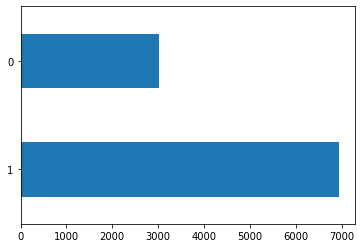

In [40]:
print(data_df['label'].value_counts())
data_df['label'].value_counts().plot(kind='barh')

In [41]:
def loaddicchar():
    dic = {}
    char1252 = 'aÃÄ|aÃÅ|aÃâ|aÃÉ|aÃ£|√¢ÃÄ|√¢ÃÅ|√¢Ãâ|√¢ÃÉ|√¢Ã£|ƒÉÃÄ|ƒÉÃÅ|ƒÉÃâ|ƒÉÃÉ|ƒÉÃ£|eÃÄ|eÃÅ|eÃâ|eÃÉ|eÃ£|√™ÃÄ|√™ÃÅ|√™Ãâ|√™ÃÉ|√™Ã£|ƒë|iÃÄ|iÃÅ|iÃâ|iÃÉ|iÃ£|oÃÄ|oÃÅ|oÃâ|oÃÉ|oÃ£|√¥ÃÄ|√¥ÃÅ|√¥Ãâ|√¥ÃÉ|√¥Ã£|∆°ÃÄ|∆°ÃÅ|∆°Ãâ|∆°ÃÉ|∆°Ã£|uÃÄ|uÃÅ|uÃâ|uÃÉ|uÃ£|∆∞ÃÄ|∆∞ÃÅ|∆∞Ãâ|∆∞ÃÉ|∆∞Ã£|yÃÄ|yÃÅ|yÃâ|yÃÉ|yÃ£|AÃÄ|AÃÅ|AÃâ|AÃÉ|AÃ£|√ÇÃÄ|√ÇÃÅ|√ÇÃâ|√ÇÃÉ|√ÇÃ£|ƒÇÃÄ|ƒÇÃÅ|ƒÇÃâ|ƒÇÃÉ|ƒÇÃ£|EÃÄ|EÃÅ|EÃâ|EÃÉ|EÃ£|√äÃÄ|√äÃÅ|√äÃâ|√äÃÉ|√äÃ£|IÃÄ|IÃÅ|IÃâ|IÃÉ|IÃ£|OÃÄ|OÃÅ|OÃâ|OÃÉ|OÃ£|√îÃÄ|√îÃÅ|√îÃâ|√îÃÉ|√îÃ£|∆†ÃÄ|∆†ÃÅ|∆†Ãâ|∆†ÃÉ|∆†Ã£|UÃÄ|UÃÅ|UÃâ|UÃÉ|UÃ£|∆ØÃÄ|∆ØÃÅ|∆ØÃâ|∆ØÃÉ|∆ØÃ£|YÃÄ|YÃÅ|YÃâ|YÃÉ|YÃ£'.split(
        '|')
    charutf8 = "√†|√°|·∫£|√£|·∫°|·∫ß|·∫•|·∫©|·∫´|·∫≠|·∫±|·∫Ø|·∫≥|·∫µ|·∫∑|√®|√©|·∫ª|·∫Ω|·∫π|·ªÅ|·∫ø|·ªÉ|·ªÖ|·ªá|ƒë|√¨|√≠|·ªâ|ƒ©|·ªã|√≤|√≥|·ªè|√µ|·ªç|·ªì|·ªë|·ªï|·ªó|·ªô|·ªù|·ªõ|·ªü|·ª°|·ª£|√π|√∫|·ªß|≈©|·ª•|·ª´|·ª©|·ª≠|·ªØ|·ª±|·ª≥|√Ω|·ª∑|·ªπ|·ªµ|√Ä|√Å|·∫¢|√É|·∫†|·∫¶|·∫§|·∫®|·∫™|·∫¨|·∫∞|·∫Æ|·∫≤|·∫¥|·∫∂|√à|√â|·∫∫|·∫º|·∫∏|·ªÄ|·∫æ|·ªÇ|·ªÑ|·ªÜ|√å|√ç|·ªà|ƒ®|·ªä|√í|√ì|·ªé|√ï|·ªå|·ªí|·ªê|·ªî|·ªñ|·ªò|·ªú|·ªö|·ªû|·ª†|·ª¢|√ô|√ö|·ª¶|≈®|·ª§|·ª™|·ª®|·ª¨|·ªÆ|·ª∞|·ª≤|√ù|·ª∂|·ª∏|·ª¥".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
 
dicchar = loaddicchar()
 
# ƒê∆∞a to√†n b·ªô d·ªØ li·ªáu qua h√†m n√†y ƒë·ªÉ chu·∫©n h√≥a l·∫°i
def convert_unicode(txt):
    return re.sub(
        r'aÃÄ|aÃÅ|aÃâ|aÃÉ|aÃ£|√¢ÃÄ|√¢ÃÅ|√¢Ãâ|√¢ÃÉ|√¢Ã£|ƒÉÃÄ|ƒÉÃÅ|ƒÉÃâ|ƒÉÃÉ|ƒÉÃ£|eÃÄ|eÃÅ|eÃâ|eÃÉ|eÃ£|√™ÃÄ|√™ÃÅ|√™Ãâ|√™ÃÉ|√™Ã£|ƒë|iÃÄ|iÃÅ|iÃâ|iÃÉ|iÃ£|oÃÄ|oÃÅ|oÃâ|oÃÉ|oÃ£|√¥ÃÄ|√¥ÃÅ|√¥Ãâ|√¥ÃÉ|√¥Ã£|∆°ÃÄ|∆°ÃÅ|∆°Ãâ|∆°ÃÉ|∆°Ã£|uÃÄ|uÃÅ|uÃâ|uÃÉ|uÃ£|∆∞ÃÄ|∆∞ÃÅ|∆∞Ãâ|∆∞ÃÉ|∆∞Ã£|yÃÄ|yÃÅ|yÃâ|yÃÉ|yÃ£|AÃÄ|AÃÅ|AÃâ|AÃÉ|AÃ£|√ÇÃÄ|√ÇÃÅ|√ÇÃâ|√ÇÃÉ|√ÇÃ£|ƒÇÃÄ|ƒÇÃÅ|ƒÇÃâ|ƒÇÃÉ|ƒÇÃ£|EÃÄ|EÃÅ|EÃâ|EÃÉ|EÃ£|√äÃÄ|√äÃÅ|√äÃâ|√äÃÉ|√äÃ£|IÃÄ|IÃÅ|IÃâ|IÃÉ|IÃ£|OÃÄ|OÃÅ|OÃâ|OÃÉ|OÃ£|√îÃÄ|√îÃÅ|√îÃâ|√îÃÉ|√îÃ£|∆†ÃÄ|∆†ÃÅ|∆†Ãâ|∆†ÃÉ|∆†Ã£|UÃÄ|UÃÅ|UÃâ|UÃÉ|UÃ£|∆ØÃÄ|∆ØÃÅ|∆ØÃâ|∆ØÃÉ|∆ØÃ£|YÃÄ|YÃÅ|YÃâ|YÃÉ|YÃ£',
        lambda x: dicchar[x.group()], txt)

In [42]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("./vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

uniChars = "√†√°·∫£√£·∫°√¢·∫ß·∫•·∫©·∫´·∫≠ƒÉ·∫±·∫Ø·∫≥·∫µ·∫∑√®√©·∫ª·∫Ω·∫π√™·ªÅ·∫ø·ªÉ·ªÖ·ªáƒë√¨√≠·ªâƒ©·ªã√≤√≥·ªè√µ·ªç√¥·ªì·ªë·ªï·ªó·ªô∆°·ªù·ªõ·ªü·ª°·ª£√π√∫·ªß≈©·ª•∆∞·ª´·ª©·ª≠·ªØ·ª±·ª≥√Ω·ª∑·ªπ·ªµ√Ä√Å·∫¢√É·∫†√Ç·∫¶·∫§·∫®·∫™·∫¨ƒÇ·∫∞·∫Æ·∫≤·∫¥·∫∂√à√â·∫∫·∫º·∫∏√ä·ªÄ·∫æ·ªÇ·ªÑ·ªÜƒê√å√ç·ªàƒ®·ªä√í√ì·ªé√ï·ªå√î·ªí·ªê·ªî·ªñ·ªò∆†·ªú·ªö·ªû·ª†·ª¢√ô√ö·ª¶≈®·ª§∆Ø·ª™·ª®·ª¨·ªÆ·ª∞·ª≤√ù·ª∂·ª∏·ª¥√ÇƒÇƒê√î∆†∆Ø"
punc_re = '[^\w'+uniChars+']'
def preprocess_text(sen):
  ##Unicode reform
  assert isinstance(sen, str), 'Not String'
  sen = convert_unicode(sen)
  ##Remove punctuation
  sen = re.sub(punc_re,' ', sen)
  ##Remove multiple space
  sen = re.sub('\s+',' ', sen)
  ##Lower
  sen = sen.lower()
  ##Segment
  seg = rdrsegmenter.tokenize(sen)
  if len(seg) == 0:
    sen = ' '
  else: 
    sen = ' '.join(seg[0])
  return sen
# vec_pre = np.vectorize(preprocess_text)
# print(vec_pre((data_df.iloc[3,3])))
data_df['preprocess_comment'] = data_df.apply(lambda x: preprocess_text(x['Comment']), axis = 1)

In [43]:
data_df.head()

RevId    UserId   ResId  \
0  3648046   8920424  965165   
1  3695359  18558601  965165   
2  3695487  13885433  965165   
3  4256913  11400976  965165   
4  4246644    525112  965165   

                                             Comment  \
0  ƒê·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p d...   
1  D·ªìi kh√° ngon, mua v·ªÅ c√≤n n√≥ng m·ªü ra th∆°m ph·ª©c,...   
2  ƒê·∫∑t xu·∫•t m·ª≥ tr·ªôn th·∫≠p c·∫©m, kh√° ƒë·∫ßy ƒë·ªß v√† ƒë·∫ßy ƒë...   
3  Kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7.9 lu√¥n. ƒê·∫∑t b√°n...   
4  D·ªìi s·ª•n b√© t·∫πo, gi√° qu√° cao so v·ªõi c√°c qu√°n kh...   

                                          image_urls  score  label  \
0  local1_folder-1/foody-doi-sun-pate-shop-online...    5.8      0   
1  local1_folder-1/foody-doi-sun-pate-shop-online...    9.0      1   
2  local1_folder-1/foody-doi-sun-pate-shop-online...    9.4      1   
3  local1_folder-1/foody-doi-sun-pate-shop-online...    4.6      0   
4  local1_folder-1/foody-doi-sun-pate-shop-online...    1.0      0   

                                  preprocess_comment  
0  ƒë·∫∑t d·ªìi s·ª•n c·ªßa qu√°n v√¨ ƒë·ªçc comment th·∫•y h·∫•p_d...  
1  d·ªìi kh√° ngon mua v·ªÅ c√≤n n√≥ng m·ªü ra th∆°m_ph·ª©c s...  
2  ƒë·∫∑t xu·∫•t m·ª≥ tr·ªôn th·∫≠p_c·∫©m kh√° ƒë·∫ßy_ƒë·ªß v√† ƒë·∫ßy_ƒë·∫∑...  
3  kh√¥ng hi·ªÉu sao qu√°n n√†y ƒë∆∞·ª£c 7 9 lu√¥n ƒë·∫∑t b√°nh...  
4  d·ªìi s·ª•n b√© t·∫πo gi√° qu√° cao so v·ªõi c√°c qu√°n kh√°...

In [44]:
data_df[data_df['preprocess_comment']==" "].shape
# data_df.drop(data_df[data_df['preprocess_comment']==" "].index, inplace = True)

(9, 8)

In [45]:
data_df = data_df.reset_index()
data_df['preprocess_comment'][4187:4191]

4187    v·ªã_tr√≠ ·ªü m·∫∑t ƒë∆∞·ªùng nh∆∞ng ·ªü c·∫°nh qu√°n m√¨ cay to...
4188    th·∫≠t tuy·ªát_c√∫ m√®o lu√¥n m·ªói c·ªëc hoa_qu·∫£ d·∫ßm ·ªü ƒë...
4189    m√¨nh ƒë√£ ƒÉn_·ªü ƒë·ªãa_ƒëi·ªÉm 211 ch√πa l√°ng ƒë∆∞·ª£c h∆°n 1...
4190    nghe m·ªçi ng∆∞·ªùi khen qu√°n n√†y d·ªØ l√©m n√™n h√¥m_na...
Name: preprocess_comment, dtype: object

In [46]:
a = data_df['preprocess_comment'].str.split()
a = a.apply(lambda x: len(x))
a[a==1]

314     1
415     1
744     1
1011    1
1077    1
1543    1
1779    1
1808    1
1888    1
2302    1
2337    1
2528    1
2836    1
2873    1
2976    1
3489    1
3643    1
4328    1
4409    1
4645    1
5242    1
5564    1
5976    1
6341    1
6487    1
6748    1
7554    1
7603    1
8684    1
8881    1
9377    1
9523    1
Name: preprocess_comment, dtype: int64

In [47]:
a

0        56
1        43
2        38
3        34
4        74
       ... 
9970     42
9971     48
9972    107
9973    185
9974     17
Name: preprocess_comment, Length: 9975, dtype: int64

In [48]:
data_df['Comment'][195]

'S·ªØa chua m√≠t + tr√† ƒë√†o ngon, caramen trong s·ªØa chua ƒÉn c≈©ng ok, gi√° v·ª´a ph·∫£i. Qu√°n s·∫°ch s·∫Ω, nh√¢n vi√™n ph·ª•c v·ª• t·ªët. S·∫Ω quay l·∫°i.'

<AxesSubplot:>

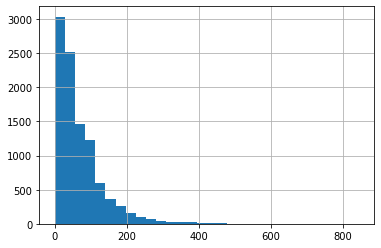

In [49]:
seq_len = [len(i.split()) for i in data_df['preprocess_comment']]

pd.Series(seq_len).hist(bins = 30)

# Load BPE, Vocab of PhoBERT and DataGen

In [50]:
from transformers import AutoModel, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [51]:
def collate_batch(batch):
  input_ids = []
  attention_masks = []
  imgs = []
  img_len = []
  labels = []
  for bt in batch:
    input_ids.append(bt[0]['input_ids'][0])
    attention_masks.append(bt[0]['attention_mask'][0])
    imgs.extend(bt[1])
    img_len.append(len(bt[1]))
    labels.append(bt[2])

  bert_tokens = torch.stack(input_ids)
  attention_masks = torch.stack(attention_masks)
  imgs_torch = torch.stack(imgs)
  labels = torch.LongTensor(labels)

  return  { 'input_ids': bert_tokens , 'attention_mask':attention_masks } , imgs_torch, img_len, labels

In [52]:
trans = T.ToTensor()
RANDOM_SEED = 0
MAX_LEN = 150


class SentimentData(Dataset):
  def __init__(self, data, transform = None):
    self.df = data.reset_index(drop=True)
    self.transform = transform
  def __len__(self):
    # print('Size',len(self.df))
    return len(self.df)  
  def __getitem__(self,idx):
    text = self.df["preprocess_comment"][idx]
    text = tokenizer(text, padding='max_length', truncation=True, max_length = MAX_LEN, return_tensors="pt")

    img_list = []
    for path in self.df['image_urls'][idx].split(","):
#       img_path = '/' + path.split('/')[-1]
        if path in data_zip.namelist():
          img = Image.open(data_zip.open(path))
          if self.transform is not None:
            img = self.transform(img)
          img_list.append(img)
        else:
          img = Image.open(bin_zip.open(path))
          if self.transform is not None:
            img = self.transform(img)
          img_list.append(img)

    # print(text.shape)
    # text = ' '.join(text[0])
    label = self.df["label"][idx]

    return (text, img_list, label)

class SentimentDataModule(pl.LightningDataModule):
    
  def __init__(self, data, batch_size: int = 8, test_size = 0.2):
      super().__init__()
      self.test_size = test_size
      self.data = data
      self.batch_size = batch_size
      self.train_data = ''
      self.val_data = ''
      self.test_data = ''
    
  def insert_bin_image(self, df):
    sample_df = df.sample(frac=0.2, random_state=0)
    df.drop(sample_df.index, inplace=True)
    df = df.reset_index(drop=True)
    sample_df = sample_df.reset_index(drop=True)
    folder = ['mountains', 'mountain-peaks', 'snow']
    for i in range(len(sample_df)):
        list_img = []
        for j in range(len(sample_df.iloc[i]['image_urls'].split(','))):
            num_img = ''
            img = ''
            while True:
                num_ran = random.randint(1, 900)
                num_fold = random.randint(0, 2)
                num_img = '0'* (6-len(str(num_ran))) + str(num_ran)
                img = Image.open(bin_zip.open('archive/'+folder[num_fold]+'/'+folder[num_fold]+'_'+ num_img + '.png'))
#                 print(len(np.asarray(img).shape))
                if len(np.asarray(img).shape) == 3:
                    break;
            list_img.append('archive/'+folder[num_fold]+'/'+folder[num_fold]+'_'+ num_img + '.png')
        sample_df.loc[i,'image_urls'] = ','.join(list_img)
    
    df = pd.concat([df,sample_df], ignore_index = True)
    
    return df

  def prepare_data(self):
      self.train_data, self.val_data = train_test_split(self.data, test_size = self.test_size, random_state=RANDOM_SEED, stratify = self.data['label'])
      self.train_data = self.insert_bin_image(self.train_data)
#       print(self.train_data)
      self.test_data, self.val_data = train_test_split(self.val_data,test_size = 0.5, random_state=RANDOM_SEED, stratify = self.val_data['label'])
      print(self.data['label'].value_counts())
      print(self.train_data['label'].value_counts())
      print(self.val_data['label'].value_counts())
      print(self.test_data['label'].value_counts())

  def setup(self, stage = None):
      train_transform = T.Compose([
       T.Resize([299, 299]), T.RandomHorizontalFlip(), T.RandomRotation(10),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])
      ])
      val_transform = T.Compose([
        T.Resize([299, 299]), T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])
      ])
      test_transform = T.Compose([
        T.Resize([299, 299]), T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])
      ])
      self.train = SentimentData(self.train_data, train_transform)
      self.val = SentimentData(self.val_data, val_transform)
      self.test = SentimentData(self.test_data, test_transform)


  def train_dataloader(self):
      return DataLoader(self.train, batch_size=self.batch_size, shuffle=True, collate_fn=collate_batch)

  def val_dataloader(self):
      return DataLoader(self.val, batch_size=self.batch_size, collate_fn=collate_batch)

  def test_dataloader(self):
      return DataLoader(self.test, batch_size=self.batch_size, collate_fn=collate_batch)

  

In [53]:
# Do some Test with data
if __name__ == "__main__":
  dm = SentimentDataModule(data_df)
  dm.prepare_data()
  dm.setup()
  for step, bat in enumerate(dm.train_dataloader()):
    if step > 0: break
    print(step)
    print(bat[0]['input_ids'].shape)
    print(bat[1].shape)
    print(sum(bat[2]))
    print(len(bat[3]))

1    6952
0    3023
Name: label, dtype: int64
1    5562
0    2418
Name: label, dtype: int64
1    695
0    303
Name: label, dtype: int64
1    695
0    302
Name: label, dtype: int64
0
torch.Size([8, 150])
torch.Size([24, 3, 299, 299])
24
8


In [54]:
dm.train_data[7579:]

index     RevId    UserId    ResId  \
7579   2596   4279279  18004575   953928   
7580    299    379949    916420   165262   
7581   7603   7842726  10737124   646317   
7582    872   2967815  12880362    14211   
7583   6843   7053081  13351742   913447   
...     ...       ...       ...      ...   
7975   4616  13408308  10198538  1036826   
7976   1229   4729540  13810708   726012   
7977   9051   1884315  10387153   657627   
7978    234   2266332  12254994   693748   
7979   2395   1346561   1801911   648971   

                                                Comment  \
7579                         M·ª≥ ngon ƒë·∫•y, ƒë√°nh gi√° 4,5*   
7580  Kh√¥ng gian ƒë·∫πp, r·∫•t sang, ƒë√∫ng ki·ªÉu ch√¢u √Çu c·ªï...   
7581                                                Abc   
7582  g√† ran v·∫´n r·∫•t ngon t·ª´ tr∆∞∆°cs ƒë·∫øn nay. ƒÉn kh√°c...   
7583  L·∫ßn ƒë·∫ßu ti√™n m√¨nh ƒë·∫øn ƒë√¢y üòÑ\nKh√¥ng gian y√™n tƒ©...   
...                                                 ...   
7975  Qu√°n si√™u cute, ƒë·∫≠m ch·∫•t h√†n, vibe c·ªßa si√™u ƒë·ªâ...   
7976  The Alley th√¨ ƒë√£ qu√° quen thu·ªôc r·ªìi, c√≥ m√≥n m·ªõ...   
7977  B√≠t t·∫øt th√¨ v·∫´n ngon nh∆∞ m·ªçi khi\nh√¥m nay nh√† ...   
7978  R·∫•t h√†i l√≤ng v·ªõi c√°ch ph·ª•c v·ª• ·ªü ƒë√¢y. Anh qu·∫£n ...   
7979  Qu√°n ph·ªü ƒë√™m theo m√¨nh l√† ·ªïn nh·∫•t trong s·ªë nh·ªØ...   

                                             image_urls  score  label  \
7579                       archive/snow/snow_000401.png    9.8      1   
7580  archive/mountains/mountains_000411.png,archive...    9.0      1   
7581  archive/mountain-peaks/mountain-peaks_000813.p...    4.2      0   
7582  archive/mountains/mountains_000714.png,archive...    9.2      1   
7583                       archive/snow/snow_000332.png    9.6      1   
...                                                 ...    ...    ...   
7975   archive/mountain-peaks/mountain-peaks_000526.png   10.0      1   
7976  archive/snow/snow_000646.png,archive/snow/snow...    8.0      1   
7977   archive/mountain-peaks/mountain-peaks_000401.png    9.4      1   
7978             archive/mountains/mountains_000275.png    9.2      1   
7979  archive/mountains/mountains_000863.png,archive...    8.2      1   

                                     preprocess_comment  
7579                           m·ª≥ ngon ƒë·∫•y ƒë√°nh_gi√° 4 5  
7580  kh√¥ng_gian ƒë·∫πp r·∫•t sang ƒë√∫ng ki·ªÉu ch√¢u_√¢u c·ªï t...  
7581                                                abc  
7582  g√† ran v·∫´n r·∫•t ngon t·ª´ tr∆∞∆°cs ƒë·∫øn nay ƒÉn kh√°c ...  
7583  l·∫ßn ƒë·∫ßu_ti√™n m√¨nh ƒë·∫øn ƒë√¢y kh√¥ng_gian y√™n_tƒ©nh ...  
...                                                 ...  
7975  qu√°n si√™u cute ƒë·∫≠m ch·∫•t h√†n vibe c·ªßa si√™u ƒë·ªânh...  
7976  the alley th√¨ ƒë√£ qu√° quen_thu·ªôc r·ªìi c√≥ m√≥n m·ªõi...  
7977  b√≠t t·∫øt th√¨ v·∫´n ngon nh∆∞ m·ªçi_khi h√¥m_nay nh√† m...  
7978  r·∫•t h√†i_l√≤ng v·ªõi c√°ch ph·ª•c_v·ª• ·ªü ƒë√¢y anh qu·∫£n_l...  
7979  qu√°n ph·ªü ƒë√™m theo m√¨nh l√† ·ªïn nh·∫•t trong s·ªë nh·ªØ...  

[401 rows x 9 columns]

In [55]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Computation device: cuda:1



# PhoBERT

In [56]:
from transformers import RobertaModel, RobertaConfig, AdamW, AutoModel
from transformers import RobertaForSequenceClassification

pretrained_config_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/config.json"
pretrained_model_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/model.bin"

In [57]:
class Bert_Lstm(nn.Module):
  def __init__(self):
    super().__init__()
    self.PhoBERT = AutoModel.from_pretrained("vinai/phobert-base")

    self.lstm = nn.LSTM(input_size=768, hidden_size=128, num_layers= 1, batch_first=True)
  
  def forward(self, texts):
    bert_out = self.PhoBERT(texts['input_ids'],token_type_ids=None, attention_mask = texts['attention_mask'])
    bert_out = bert_out['last_hidden_state']
    out, _ = self.lstm(bert_out)
    feature_extract = out[:,-1,:].contiguous()

    return feature_extract

In [58]:
# # This time, the output's 2nd dimension is 3, indicating that there were 3 outputs given by the LSTM. 
# # This corresponds to the length of our input sequence. 
# # For the use cases where we'll need an output at every time step (many-to-many), such as Text Generation, the output of each time step can be extracted directly from the 2nd dimension and fed into a fully connected layer. 
# # For text classification tasks (many-to-one), such as Sentiment Analysis, the last output can be taken to be fed into a classifier.

# pho_test = Bert_Lstm()
# pho_test
# # oooo = pho_test('iiii')
# for name, child in pho_test.named_children():
#   print(name)

# InceptionV3

In [59]:
from torchvision.models import inception_v3

In [60]:
# class Inception(nn.Module):
#   def __init__(self):
#     super(Inception,self).__init__()
#     self.incept = inception_v3(pretrained = True,progress = True,aux_logits= False,transform_input = True)
#     self.incept_sequen = nn.Sequential(*list(self.incept.children())[:-3])
#     self.avgpool = nn.AdaptiveAvgPool2d((1,1))
#     self.drop = nn.Dropout(p=0.4)
#     self.flat = nn.Linear(2048, 128)

#   def process(self, feature, len_img_list):
#     max_fea = torch.zeros(len(len_img_list), feature.shape[-1]).to(device)
#     start = 0
#     for idx, num in enumerate(len_img_list):
#       max_fea[idx] = feature[start:start+num].max(0)[0]
#       start += num

#     return max_fea
  

#   def forward(self, image, len_img_list):
#     feature = self.incept_sequen(image)
#     feature = self.avgpool(feature)
#     feature = self.drop(feature)
#     feature = feature.reshape(-1, 2048)
# #     feature = self.drop(feature)
#     # out = self.avgpool(feature)
#     # print(out.shape)
#     # out = out.contiguous().view(-1, 2048)
#     out = self.process(feature, len_img_list)
#     img_fea = self.flat(out)

#     return img_fea


In [61]:
# img_fea = torch.rand(4,128).to(device)
# img_fea.shape
# text_fea = torch.rand(2,128).to(device)
# len_img_list=[2,2]

In [62]:
# def attention(image_fea, text_fea, len_img_list):
#     m = nn.Softmax(dim=0)
#     scale = 1.0/np.sqrt(128)
# #     context_vector = torch.mul(text_fea, m(torch.matmul(text_fea, img_fea.permute(1,0))))
#     context_vector = torch.zeros(len(len_img_list), 128).to(device)
#     start_term = 0
#     for i in range(len(len_img_list)):
#         context_vector[i] = torch.mul(text_fea[i], m(torch.matmul(image_fea[start_term: start_term + len_img_list[i]], text_fea[i].contiguous().view(128,-1))*scale)).sum(dim=0)
#         start_term += len_img_list[i]
#     return context_vector

In [63]:
# m = nn.Softmax(dim=0)
# scale = 1.0/np.sqrt(128)
# m(torch.matmul(img_fea[0: 2], text_fea[0].contiguous().view(128,-1))*scale)

In [64]:
# print(img_fea[0: 2].shape)
# img_fea[0: 2]

In [65]:
# torch.mul(img_fea[0:2], m(torch.matmul(img_fea[0: 2], text_fea[0].contiguous().view(128,-1))*scale))

In [66]:
# torch.matmul(img_fea[0: 2], text_fea[0].contiguous().view(128,-1))

In [67]:
# context = attention(img_fea, text_fea, len_img_list)
# context

In [68]:
# context.shape

In [69]:
class Inception(nn.Module):
  def __init__(self):
    super(Inception,self).__init__()
    self.incept = inception_v3(pretrained = True,progress = True,aux_logits= False,transform_input = True)
    self.incept_sequen = nn.Sequential(*list(self.incept.children())[:-3])
    self.avgpool = nn.AdaptiveAvgPool2d((1,1))
    self.drop = nn.Dropout(p=0.4)
#     self.flat = nn.Linear(2048, 128)
    self.ffn = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
#             nn.Dropout(0.3),
            nn.Linear(512, 128),
            nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(128, 2),
        )
  
  def forward(self, image, len_img_list):
    feature = self.incept_sequen(image)
    feature = self.avgpool(feature)
    feature = self.drop(feature)

    img_fea = feature.reshape(-1, 2048)
    out = self.ffn(img_fea)

    
    return out


In [70]:
# inc = inception_v3(pretrained = True,progress = True,aux_logits= False,transform_input = False)
# inc

In [71]:
# incept_sequen = nn.Sequential(*list(inc.children())[:-3])
# incept_sequen

In [72]:
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras import layers
# from tensorflow.keras import models
# from tensorflow.keras.models import Model

# basemodel = InceptionV3(weights='imagenet', include_top=False, input_tensor=layers.Input(shape=(299, 299, 3)))
# x = basemodel.output
# # t = layers.AveragePooling2D(pool_size=(8, 8), name='AVG_Pooling')(x)
# model_cnn = Model(basemodel.input, x)

# basemodel.summary()

In [73]:
# ou = model_cnn(np.random.rand(1,299,299,3))

In [74]:
# ou.shape

# Multimodal (no pytorch-lightning)

In [75]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter('runs/mrtrongmodel')

class LRScheduler():
    def __init__(
        self, optimizer, patience=1, min_lr=1e-6, factor=0.1
    ):
        self.optimizer = optimizer
        self.patience = patience
        self.min_lr = min_lr
        self.factor = factor
        self.lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau( 
                self.optimizer,
                mode='max',
                patience=self.patience,
                factor=self.factor,
                min_lr=self.min_lr,
                verbose=True
            )
    def __call__(self, val_loss):
        self.lr_scheduler.step(val_loss)

class EarlyStopping():
    def __init__(self, patience=8, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

In [76]:
class Concatmodal(nn.Module):
  def __init__(self):
    super(Concatmodal,self).__init__()
    # self.loss_module = nn.CrossEntropyLoss()
    self.BERT = Bert_Lstm()
    self.incept = Inception()
    self.dense = nn.Linear(256,256)
    self.cl = nn.Linear(256,2)
    # self.bpe_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/bpe.codes"
    # self.vocab_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/dict.txt"
    
  def attention(self, image_fea, text_fea, len_img_list):
    m = nn.Softmax(dim=0)
    scale = 1.0/np.sqrt(128)
#     context_vector = torch.mul(text_fea, m(torch.matmul(text_fea, img_fea.permute(1,0))))
    context_vector = torch.zeros(len(len_img_list), 128).to(device)
    start_term = 0
    for i in range(len(len_img_list)):
        context_vector[i] = torch.mul(image_fea[start_term: start_term + len_img_list[i]], m(torch.matmul(image_fea[start_term: start_term + len_img_list[i]], text_fea[i].contiguous().view(128,-1))*scale)).sum(dim=0)
        start_term += len_img_list[i]
    return context_vector
        
  def forward(self, image, inputs, len_img_list, labels=None):
    for key in inputs:
        inputs[key] = inputs[key].to(device)
    image = image.to(device)

    fea1 = self.BERT(inputs)
    fea2 = self.incept(image, len_img_list)
    
    context_vec = self.attention(fea2, fea1,  len_img_list)
    cat = torch.cat((fea1, context_vec), 1)
    out = self.cl(cat)

    return out


In [77]:
def fit(model, dm, criterion, optimizer, epoch):
  running_loss = 0.0
  train_running_loss = 0.0
  # running_correct = 0
  reporting_step = 100
  train_preds = np.array([])
  train_labels = np.array([])

  counter = 0
  # total = 0
  soft_m = nn.Softmax(dim=-1)

  model.train()

  for i, (texts, images, len_img_list, labels) in enumerate(dm.train_dataloader()):
      counter += 1
      labels = labels.to(device)
      optimizer.zero_grad()

      outputs = model(images, texts, len_img_list)
      loss = criterion(outputs, labels)
      output_scores = soft_m(outputs)
      predictions = torch.argmax(output_scores, dim=-1)

      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      train_running_loss += loss.item()
        
      predictions = predictions.cpu().numpy()
      labels = labels.cpu().numpy()
      # _, preds = torch.max(outputs.data, 1)
      train_preds = np.concatenate((train_preds, predictions), axis=0)
      train_labels = np.concatenate((train_labels, labels), axis=0)

      if i % reporting_step == reporting_step-1:
            print(f"Epoch {epoch} Step {i} ave_loss {running_loss/reporting_step:0.4f}")
            running_loss = 0.0
            
  train_loss = train_running_loss / counter
  reports = classification_report(train_labels, train_preds, output_dict=True)
  print(confusion_matrix(train_labels, train_preds))
  train_ac = classification_report(train_labels, train_preds, output_dict=True)['macro avg']['f1-score']
    
#   writer.add_scalar("Loss/train", train_loss, epoch)
#   writer.add_scalar("macro-f1/train", reports['macro avg']['f1-score'], epoch)
#   writer.add_scalar("Acc/train", train_ac, epoch)


  return train_loss, train_ac

In [78]:
def validation(model, dm, criterion):
  model.eval()
  val_running_loss = 0.0
  val_preds = np.array([])
  val_labels = np.array([])

  soft_m = nn.Softmax(dim=-1)

  counter = 0

  with torch.no_grad():
    for i, (texts, images, len_img_list, labels) in enumerate(dm.val_dataloader()):
        counter += 1
        labels = labels.to(device)

        outputs = model(images, texts, len_img_list)

        loss = criterion(outputs, labels)
        output_scores = soft_m(outputs)
        predictions = torch.argmax(output_scores, dim=-1)

        predictions = predictions.cpu().numpy()
        labels = labels.cpu().numpy()
        
        val_running_loss += loss.item()
        val_preds = np.concatenate((val_preds, predictions), axis=0)
        val_labels = np.concatenate((val_labels, labels), axis=0)
    

  val_loss = val_running_loss / counter
  print(classification_report(val_labels, val_preds))
  print(confusion_matrix(val_labels, val_preds))
#   val_ac = accuracy_score(val_labels, val_preds)
  val_ac = classification_report(val_labels, val_preds, output_dict=True)['macro avg']['f1-score']


#   writer.add_scalar("Loss/val", val_loss, epoch)
#   writer.add_scalar("Acc/val", val_ac, epoch)
#   writer.add_scalar("macro-f1/val", reports['macro avg']['f1-score'], epoch)
  
  return val_loss, val_ac


In [94]:

def testing(model, dm):
  model.eval()
  test_running_loss = 0.0
  counter = 0
  test_preds = torch.tensor([], device=device)
  test_labels = torch.tensor([], device = device)

  soft_m = nn.Softmax(dim=-1)


  with torch.no_grad():
    for i, (texts, images, inputs, labels) in enumerate(dm.test_dataloader()):
        counter += 1
        labels = labels.to(device)

        outputs = model(images, texts, inputs)

        output_scores = soft_m(outputs)
        predictions = torch.argmax(output_scores, dim=-1)

        test_preds = torch.cat((test_preds, predictions), dim=0)
        test_labels = torch.cat((test_labels, labels), dim=0)

        # loss = criterion(outputs, labels)
        # test_running_loss += loss.item()
    
  test_preds = test_preds.cpu().numpy()
  test_labels = test_labels.cpu().numpy()
       
  print('test', classification_report(test_labels, test_preds))
  print('test_ac', accuracy_score(test_labels, test_preds))
  print('Confusion', confusion_matrix(test_labels, test_preds))
  print('Macro_f1', classification_report(test_labels, test_preds, output_dict=True)['macro avg']['f1-score'])
  
  # test_loss = test_running_loss / counter



In [95]:
# (t, i ,l) = next(iter(dm.train_dataloader()))
# mo = Concatmodal()
# ou = mo(i, t)
# print(ou)
# sf = nn.Softmax(dim=-1)
# ou = sf(ou)
# print(ou)
# ou = torch.argmax(ou, dim=-1)
# print(ou)

In [96]:
# testing(mo, dm)

In [98]:
def save_checkpoint(state, filename='my_checkpoint_attention_seed_84_bin_img_20%_more.pth.tar'):
    print('Saving....'+ filename)
    torch.save(state, filename)

In [99]:
def save_checkpoint1(state, filename='my_checkpoint_attention_seed_84_f1_bin_img_20%_more.pth.tar'):
    print('Saving....'+ filename)
    torch.save(state, filename)

In [84]:
%ls

archive.zip
Attetion-Multimodal-Bin2.ipynb
Attetion-Multimodal-Bin2-Moredata.ipynb
Attetion-Multimodal-Bin.ipynb
Attetion-Multimodal.ipynb
Attetion-Multimodal-seed25-1e-3.ipynb
Attetion-Multimodal-seed7.ipynb
Attetion-Multimodal-Soccer.ipynb
CNN.ipynb
Inception.ipynb
Inception-VotingMultimodal.ipynb
local1_folder_temp.zip
local1_folder.zip
mountains.zip
Multimodal_newmodel.ipynb
Multimodal_newmodel-weight.ipynb
my_checkpoint_attention_seed_84_1e-3.pth.tar
my_checkpoint_attention_seed_84_bin_img_10%.pth.tar
my_checkpoint_attention_seed_84_bin_img_20%.pth.tar
my_checkpoint_attention_seed_84_bin_img.pth.tar
my_checkpoint_attention_seed_84_bin_img_soc.pth.tar
my_checkpoint_attention_seed_84_f1_1e-3.pth.tar
my_checkpoint_attention_seed_84_f1_bin_img_10%.pth.tar
my_checkpoint_attention_seed_84_f1_bin_img_20%.pth.tar
my_checkpoint_attention_seed_84_f1_bin_img.pth.tar
my_checkpoint_attention_seed_84_f1_bin_img_soc.pth.tar
my_checkpoint_attention_seed_84_f1.pth.tar
my_checkpoint_attention_seed_

In [85]:
# model = Concatmodal()
# total_params = sum(p.numel() for p in model.parameters())
# print(f"{total_params:,} total parameters.")
# total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(f"{total_trainable_params:,} training parameters.")

In [86]:
def freeze(model):  
  for param in model.BERT.PhoBERT.parameters():
    param.requires_grad = False
  for param in model.incept.incept.parameters():
    param.requires_grad = False
  return model

def unfreeze(model):  
  for param in model.BERT.PhoBERT.parameters():
    param.requires_grad = True
  for param in model.incept.incept.parameters():
    param.requires_grad = True
    # print(param)
  return model

In [87]:
# total_params = sum(p.numel() for p in model.parameters())
# print(f"{total_params:,} total parameters.")
# total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(f"{total_trainable_params:,} training parameters.")

In [88]:
# import gc
# del model
# gc.collect()

In [89]:
model = Concatmodal()
model = freeze(model)

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [90]:
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

160,473,674 total parameters.
1,640,834 training parameters.


In [91]:
from sklearn.utils.class_weight import compute_class_weight

class_weights=compute_class_weight(class_weight='balanced', classes=np.unique(dm.train_data['label']), y=dm.train_data['label'])
class_weights=torch.tensor(class_weights,dtype=torch.float).to(device)

In [92]:
!nvidia-smi

Thu Apr 21 11:28:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:5E:00.0 Off |                  N/A |
|  0%   25C    P8     1W / 250W |      3MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:86:00.0 Off |                  N/A |
|  0%   

In [93]:
from torch.optim import lr_scheduler

train_loss_list=[]
epoch_list=[]
val_loss_list=[]
val_f1_list=[]
train_f1_list=[]


#define model
model.to(device)
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")
# define hyper
# grouped_params = [
#     {"params": [p for n, p in roberta_params], "lr": 1e-5},
#     # {"params": [p for n, p in classifier_params], "lr": 3e-3}
# ]
# optimizer = torch.optim.Adam([
#         {'params': model.BERT.lstm.parameters()},  
#         {'params': model.incept.flat.parameters()}, 
#         {'params': model.incept.avgpool.parameters()},  
#         {'params': model.dense.parameters()},       
#         {'params': model.cl.parameters()},       
#         {'params': model.BERT.PhoBERT.parameters(), 'lr': 1e-5},
#         {'params': model.incept.incept.parameters(), 'lr': 1e-5}
#     ], lr=1e-3)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
#training
# def training(model, optimizer):
# define hyper
criterion = nn.CrossEntropyLoss(weight=class_weights)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)
epochs = 20
lr_scheduler = LRScheduler(optimizer)
early_stopping = EarlyStopping()
min_loss = np.Inf
max_f1 = 0

for epoch in range(epochs):
  print(f"Epoch {epoch} of {epochs}")
  train_epoch_loss, train_ac = fit(
        model, dm, criterion, optimizer, epoch
    )
  val_epoch_loss, val_epoch_ac = validation(
        model, dm, criterion
    )

  lr_scheduler(val_epoch_ac)

  print('Train acc', train_ac)
  print(f"Train Loss: {train_epoch_loss:.4f}")
  print(f'Val Loss: {val_epoch_loss:.4f}')
  print(f'Val Acc: {val_epoch_ac:.4f}')
    
  train_loss_list.append(train_epoch_loss)
  train_f1_list.append(train_ac)
  val_loss_list.append(val_epoch_loss)
  val_f1_list.append(val_epoch_ac)
  epoch_list.append(epoch)
    
  checkpoint ={'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict(), 'epoch': epoch, 'loss':val_epoch_loss }
  if (min_loss >= val_epoch_loss):
      print('Better ver saved')
      min_loss = val_epoch_loss
      save_checkpoint(checkpoint)
        
  if (val_epoch_ac >= max_f1):
      checkpoint ={'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict(), 'epoch': epoch, 'loss': val_epoch_loss, "f1": val_epoch_ac}
      print('Better ver saved')
      max_f1 = val_epoch_ac
      save_checkpoint1(checkpoint)
    
  early_stopping(val_epoch_loss)
  if early_stopping.early_stop:
      break

testing(model, dm)

160,473,674 total parameters.
1,640,834 training parameters.
Epoch 0 of 20
Epoch 0 Step 99 ave_loss 0.5954
Epoch 0 Step 199 ave_loss 0.4465
Epoch 0 Step 299 ave_loss 0.4254
Epoch 0 Step 399 ave_loss 0.4326
Epoch 0 Step 499 ave_loss 0.3974
Epoch 0 Step 599 ave_loss 0.4200
Epoch 0 Step 699 ave_loss 0.3746
Epoch 0 Step 799 ave_loss 0.4047
Epoch 0 Step 899 ave_loss 0.3643
[[1853  565]
 [ 826 4736]]
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85       303
         1.0       0.92      0.95      0.94       695

    accuracy                           0.91       998
   macro avg       0.91      0.89      0.90       998
weighted avg       0.91      0.91      0.91       998

[[249  54]
 [ 32 663]]
Train acc 0.7995225137171785
Train Loss: 0.4214
Val Loss: 0.3069
Val Acc: 0.8959
Better ver saved
Saving....my_checkpoint_attention_seed_84_bin_img_20%_more.pth.tar
Better ver saved
Saving....my_checkpoint_attention_seed_84_f1_bin_img_20%_more.pth.tar


Epoch 9 Step 399 ave_loss 0.1879
Epoch 9 Step 499 ave_loss 0.2070
Epoch 9 Step 599 ave_loss 0.1804
Epoch 9 Step 699 ave_loss 0.1779
Epoch 9 Step 799 ave_loss 0.1880
Epoch 9 Step 899 ave_loss 0.2004
[[2149  269]
 [ 185 5377]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       303
         1.0       0.94      0.97      0.95       695

    accuracy                           0.93       998
   macro avg       0.93      0.91      0.92       998
weighted avg       0.93      0.93      0.93       998

[[260  43]
 [ 22 673]]
Train acc 0.9319772492952364
Train Loss: 0.1928
Val Loss: 0.2372
Val Acc: 0.9214
INFO: Early stopping counter 3 of 8
Epoch 10 of 20
Epoch 10 Step 99 ave_loss 0.1804
Epoch 10 Step 199 ave_loss 0.1742
Epoch 10 Step 299 ave_loss 0.2004
Epoch 10 Step 399 ave_loss 0.1819
Epoch 10 Step 499 ave_loss 0.1841
Epoch 10 Step 599 ave_loss 0.2089
Epoch 10 Step 699 ave_loss 0.1736
Epoch 10 Step 799 ave_loss 0.1942
Epoch 10 Step 899 ave_

Epoch 19 Step 199 ave_loss 0.1841
Epoch 19 Step 299 ave_loss 0.1997
Epoch 19 Step 399 ave_loss 0.1662
Epoch 19 Step 499 ave_loss 0.1929
Epoch 19 Step 599 ave_loss 0.2168
Epoch 19 Step 699 ave_loss 0.1434
Epoch 19 Step 799 ave_loss 0.1871
Epoch 19 Step 899 ave_loss 0.2242
[[2161  257]
 [ 202 5360]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       303
         1.0       0.94      0.97      0.95       695

    accuracy                           0.93       998
   macro avg       0.93      0.91      0.92       998
weighted avg       0.93      0.93      0.93       998

[[260  43]
 [ 22 673]]
Train acc 0.9314679257030902
Train Loss: 0.1917
Val Loss: 0.2379
Val Acc: 0.9214
INFO: Early stopping counter 5 of 8
test               precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       302
         1.0       0.96      0.97      0.96       695

    accuracy                           0.95       997
   macro av

In [100]:
def show_graph(train_accu, eval_accu, epoch_list, type='F1'):
    plt.plot(epoch_list,train_accu ,'-o')
    plt.plot(epoch_list,eval_accu,'-o')
    plt.xlabel('epoch')
    plt.ylabel(type)
    plt.legend(['Train','Valid'])
    plt.title('Train vs Valid '+type)

    plt.show()

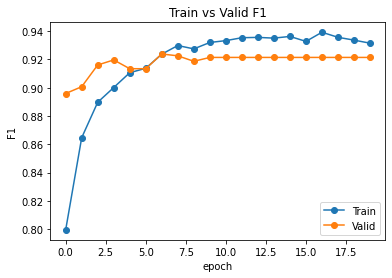

In [101]:
# freeze inception seed 84 bin 20% more data
show_graph(train_f1_list, val_f1_list, epoch_list)

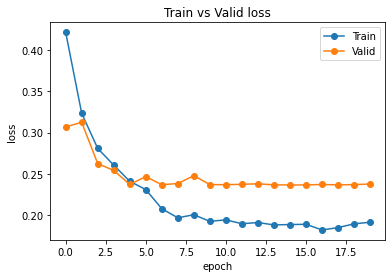

In [102]:
# freeze inception seed 84 bin 20% more data
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

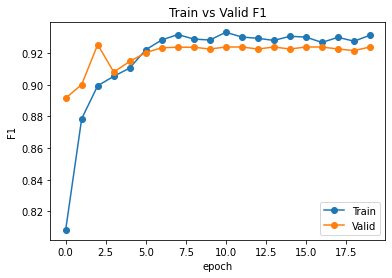

In [98]:
# freeze inception seed 0 bin
show_graph(train_f1_list, val_f1_list, epoch_list)

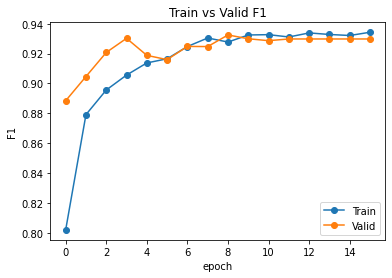

In [95]:
# freeze inception seed 7 bin
show_graph(train_f1_list, val_f1_list, epoch_list)

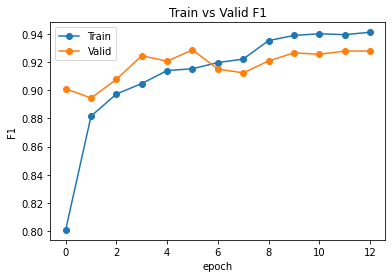

In [101]:
# freeze inception seed 84 bin 10%
show_graph(train_f1_list, val_f1_list, epoch_list)

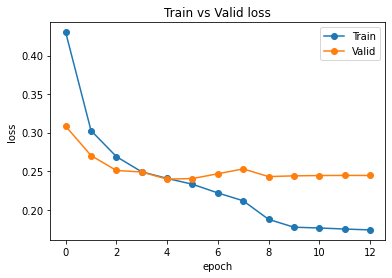

In [102]:
# freeze inception seed 84 bin 10%
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

In [ ]:
# freeze inception seed 7 bin
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

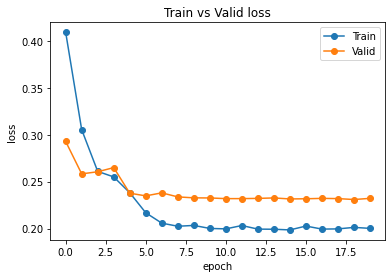

In [99]:
# freeze inception seed 0 bin
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

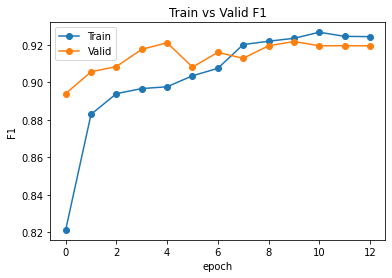

In [96]:
# freeze inception seed 84
show_graph(train_f1_list, val_f1_list, epoch_list)

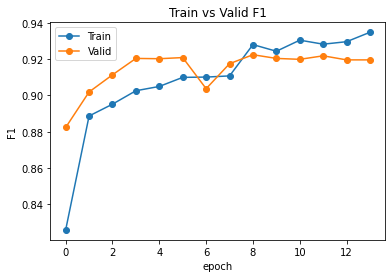

In [80]:
# freeze inception seed 25
show_graph(train_f1_list, val_f1_list, epoch_list)

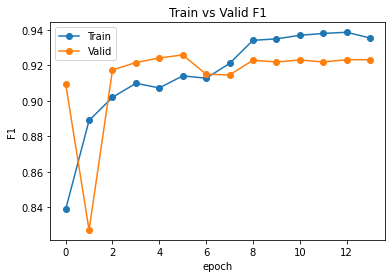

In [85]:
# freeze inception 66
show_graph(train_f1_list, val_f1_list, epoch_list)

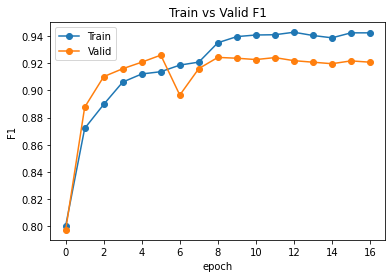

In [87]:
# freeze inception 0
show_graph(train_f1_list, val_f1_list, epoch_list)

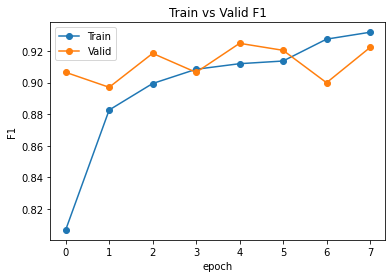

In [84]:
# freeze inception
show_graph(train_f1_list, val_f1_list, epoch_list)

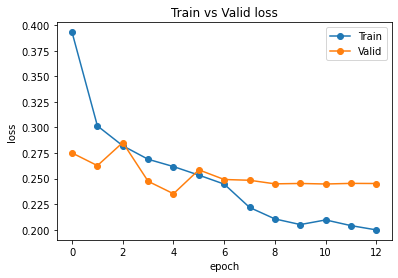

In [97]:
# freeze inception seed 84
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

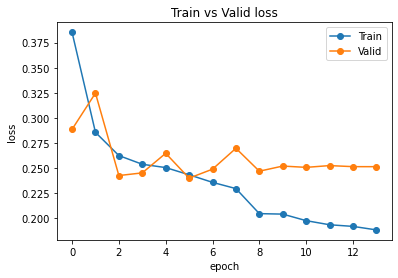

In [81]:
# freeze inception 25
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

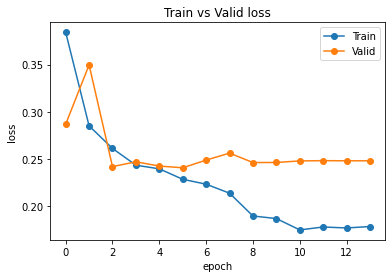

In [86]:
# freeze inception 66
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

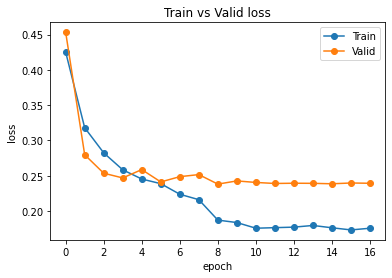

In [88]:
# freeze inception 0
show_graph(train_loss_list, val_loss_list, epoch_list, 'loss')

In [78]:
%load_ext tensorboard
%tensorboard --logdir=runs

In [76]:
epochs = 10
model = freeze(model)
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")

lr_scheduler = LRScheduler(optimizer)
early_stopping = EarlyStopping()
early_stopping(checkpoint['loss'])
criterion = nn.CrossEntropyLoss()
min_loss = checkpoint['loss']


for epoch in range(epochs):
  print(f"Epoch {epoch} of {epochs}")
  train_epoch_loss = fit(
        model, dm, criterion, optimizer, epoch
    )
  val_epoch_loss, val_epoch_ac = validation(
        model, dm, criterion
    )
  writer.flush()
  lr_scheduler(val_epoch_ac)

  early_stopping(val_epoch_loss)
  if early_stopping.early_stop:
      break
  print(f"Train Loss: {train_epoch_loss:.4f}")
  print(f'Val Loss: {val_epoch_loss:.4f}')
  print(f'Val Acc: {val_epoch_ac:.4f}')

  checkpoint ={'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict(), 'epoch': epoch, 'loss':val_epoch_loss }
  if (min_loss >= val_epoch_loss):
      print('Better ver saved')
      min_loss = val_epoch_loss
      save_checkpoint(checkpoint)

testing(model, dm)

159,621,451 total parameters.
788,611 training parameters.
Epoch 0 of 10
Epoch 0 Step 79 ave_loss 0.6103
Epoch 0 Step 159 ave_loss 0.6434
Epoch 0 Step 239 ave_loss 0.6054
Epoch 0 Step 319 ave_loss 0.5624
Epoch 0 Step 399 ave_loss 0.5728
Epoch 0 Step 479 ave_loss 0.6950
Epoch 0 Step 559 ave_loss 0.6405
Epoch 0 Step 639 ave_loss 0.6236
Epoch 0 Step 719 ave_loss 0.6085
Epoch 0 Step 799 ave_loss 0.5860
Epoch 0 Step 879 ave_loss 0.6133
Epoch 0 Step 959 ave_loss 0.6295
Epoch 0 Step 1039 ave_loss 0.5906
[[1527  209  199]
 [  83 3772  550]
 [ 208 1035 1217]]
Train acc 0.7404545454545455
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84       242
         1.0       0.82      0.79      0.81       551
         2.0       0.59      0.65      0.62       308

    accuracy                           0.76      1101
   macro avg       0.76      0.75      0.75      1101
weighted avg       0.77      0.76      0.76      1101

[[195  16  31]
 [  4 438 109]
 [ 

Epoch 7 Step 159 ave_loss 0.5261
Epoch 7 Step 239 ave_loss 0.4442
Epoch 7 Step 319 ave_loss 0.4988
Epoch 7 Step 399 ave_loss 0.5274
Epoch 7 Step 479 ave_loss 0.4470
Epoch 7 Step 559 ave_loss 0.4833
Epoch 7 Step 639 ave_loss 0.4785
Epoch 7 Step 719 ave_loss 0.5302
Epoch 7 Step 799 ave_loss 0.5249
Epoch 7 Step 879 ave_loss 0.5057
Epoch 7 Step 959 ave_loss 0.4883
Epoch 7 Step 1039 ave_loss 0.5043
[[1595  166  174]
 [  38 3950  417]
 [ 133  816 1511]]
Train acc 0.8018181818181818
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       242
         1.0       0.77      0.84      0.80       551
         2.0       0.61      0.51      0.56       308

    accuracy                           0.75      1101
   macro avg       0.74      0.73      0.74      1101
weighted avg       0.74      0.75      0.74      1101

[[204  19  19]
 [  7 464  80]
 [ 29 121 158]]
INFO: Early stopping counter 2 of 5
Train Loss: 0.4928
Val Loss: 0.5912
Val Acc: 0.7502
Epoc

In [103]:
import gc
del model 
gc.collect()

6993

In [104]:
torch.cuda.empty_cache()

In [105]:
PATH = "my_checkpoint_attention_seed_84_bin_img_20%_more.pth.tar"
checkpoint = torch.load(PATH, map_location=device)
model = Concatmodal()
model.load_state_dict(checkpoint['state_dict'])
model.to(device)
print(checkpoint['epoch'])

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


14


In [189]:
#f1
testing(model, dm)

test               precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       302
         1.0       0.96      0.96      0.96       695

    accuracy                           0.94       997
   macro avg       0.93      0.93      0.93       997
weighted avg       0.94      0.94      0.94       997

test_ac 0.9428284854563691
Confusion [[275  27]
 [ 30 665]]
Macro_f1 0.9324998307418023


In [107]:
#valloss
testing(model, dm)

test               precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       302
         1.0       0.96      0.97      0.96       695

    accuracy                           0.95       997
   macro avg       0.94      0.94      0.94       997
weighted avg       0.95      0.95      0.95       997

test_ac 0.9488465396188566
Confusion [[272  30]
 [ 21 674]]
Macro_f1 0.9389155519248444


In [75]:
optimizer = torch.optim.Adam([
        {'params': model.BERT.lstm.parameters()},  
        {'params': model.incept.flat.parameters()}, 
        {'params': model.incept.avgpool.parameters()},  
        {'params': model.dense.parameters()},       
        {'params': model.cl.parameters()},       
        {'params': model.BERT.PhoBERT.parameters(), 'lr': 1e-5},
        {'params': model.incept.incept.parameters(), 'lr': 1e-5}
    ], lr=1e-3)
optimizer.load_state_dict(checkpoint['optimizer'])

In [ ]:
import cv2
def plot(model):
  model.eval()
  test_preds = torch.tensor([], device=device)
  test_labels = torch.tensor([], device = device)
  test_text = []
  test_img = []

  soft_m = nn.Softmax(dim=-1)
  with torch.no_grad():
    for i, (texts, images, labels) in enumerate(dm.test_dataloader()):
        labels = labels.to(device)

        outputs = model(images, texts)

        output_scores = soft_m(outputs)
        predictions = torch.argmax(output_scores, dim=-1)

        test_preds = torch.cat((test_preds, predictions), dim=0)
        test_labels = torch.cat((test_labels, labels), dim=0)
        for t in texts:
          test_text.append(t) 
        for i in images:
          test_img.append(i) 

    
    test_preds = test_preds.cpu().numpy()
    test_labels = test_labels.cpu().numpy()
  i = 1
  plt.figure(figsize=(40,40))
  print(len(test_labels))
  for image, actual_label, label, text in zip(test_img, test_labels, test_preds, test_text):

      if (actual_label == label):

        plt.subplot(4,4,i)
        i+=1
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = T.ToPILImage()(image).convert("RGB")
        plt.imshow(image)
        plt.axis('off')
        plt.title("Text: {}...\n Actual: {}\n Predicted: {}".format(text[:30], actual_label, label))
        # plt.xlabel(text)
      else:
        pass
      if (i==17):
        break;
  plt.savefig('res_freeze_af20epoch.png', bbox_inches='tight')
  plt.show()
  

plot(model)


In [98]:
torch.cuda.empty_cache()

In [99]:
!nvidia-smi

Sun Mar 20 23:13:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:5E:00.0 Off |                  N/A |
|  0%   35C    P2    43W / 250W |  11004MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:86:00.0 Off |                  N/A |
|  0%   

# Multimodal

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

class Multimodal(pl.LightningModule):
  def __init__(self, lr_multi, lr_classifier):
    super(Multimodal,self).__init__()
    self.loss_module = nn.CrossEntropyLoss()
    self.BERT = Bert_Lstm()
    self.incept = Inception()
    self.dense = nn.Linear(256,256)
    self.cl = nn.Linear(256,3)
    self.bpe_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/bpe.codes"
    self.vocab_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/dict.txt"
    self.lr_multi = lr_multi
    self.lr_classifier = lr_classifier

    # self.model = self._build_model()
    # self.trainer_params = self._get_trainer_params()

  def forward(self, image, texts, labels=None):
    inputs = tokenize_data(texts, self.vocab_path, self.bpe_path)
    # b_labels = None
    # b_labels = labels.to(self.device)

    for key in inputs:
        inputs[key] = inputs[key].to(self.device)
    image = image.to(self.device)

    fea1 = self.BERT(inputs)
    fea2 = self.incept(image)
    cat = torch.cat((fea1, fea2), 1)
    out = self.cl(cat)

    return out
  
  def configure_optimizers(self):
    roberta_params = self.BERT.parameters()
    inception_params = self.incept.parameters()
    dense_params = self.dense.parameters()
    classifier_params = self.cl.parameters()

    # for n,p in classifier_params:
    #   print(n,p)

    # grouped_params = [
    #     {"params": roberta_params, "lr": self.lr_multi},
    #     {"params": inception_params, "lr": self.lr_multi},
    #     {"params": dense_params, "lr": self.lr_multi},
    #     {"params": classifier_params, "lr": self.lr_classifier}
    # ]
    # optimizer = torch.optim.AdamW(
    #     grouped_params
    # )
    optimizer = torch.optim.AdamW(
              self.parameters(), 
              lr = 0.001
          )

    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.98)
  


  def training_step(self, batch, batch_idx):
    texts, images, labels = batch
    preds = self(images, texts, labels)
    labels = labels.to(self.device)

    loss = self.loss_module(preds, labels)

    return loss
  
  def validation_step(self, batch, batch_idx):
    texts, images, labels = batch
    logits = self(images, texts, labels)

    loss = self.loss_module(logits, labels)
    output_scores = torch.softmax(logits, dim=-1)

    return loss, output_scores, labels

  def validation_epoch_end(self, validation_step_outputs):
    val_preds = torch.tensor([], device=self.device)
    val_scores = torch.tensor([], device=self.device)
    val_labels = torch.tensor([], device=self.device)
    val_loss = 0
    total_item = 0

    for idx, item in enumerate(validation_step_outputs):
        loss, output_scores, labels = item

        predictions = torch.argmax(output_scores, dim=-1)
        val_preds = torch.cat((val_preds, predictions), dim=0)
        val_scores = torch.cat((val_scores, output_scores[:, 1]), dim=0)
        val_labels = torch.cat((val_labels, labels), dim=0)

        val_loss += loss
        total_item += 1

    # print("VAL PREDS", val_preds.shape)
    # print("VAL SCORES", val_scores.shape)
    # print("VAL LABELS", val_labels.shape)
    val_preds = val_preds.cpu().numpy()
    val_scores = val_scores.cpu().numpy()
    val_labels = val_labels.cpu().numpy()

    # reports = classification_report(val_labels, val_preds, output_dict=True)
    print("VAL PREDS", val_preds)
    print("VAL LABELS", val_labels)
    print("VAL SCORES", val_scores)
    # try:
    #     auc = roc_auc_score(val_labels, val_scores)
    # except Exception as e:
    #     print(e)
    #     print("Cannot calculate AUC. Default to 0")
    #     auc = 0
    accuracy = accuracy_score(val_labels, val_preds)

    print(classification_report(val_labels, val_preds))

    self.log("loss/val", val_loss)
    # self.log("auc/val", auc)
    self.log("accuracy/val", accuracy)
    # self.log("precision/val", reports["weighted avg"]["precision"])
    # self.log("recall/val", reports["weighted avg"]["recall"])
    # self.log("f1/val", reports["weighted avg"]["f1-score"])




In [ ]:
# trainer = pl.Trainer(
#     fast_dev_run=True,
# )
# multi = Multimodal(lr_multi=1e-5, lr_classifier=3e-3)
# dm = SentimentDataModule(data_df)
# trainer.fit(multi, dm)


In [ ]:
from pytorch_lightning import loggers as pl_loggers
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

torch.manual_seed(123)

tb_logger = pl_loggers.TensorBoardLogger('/content/drive/MyDrive/Colab Notebooks/Multimodal/tb_logs/')

trainer = pl.Trainer(
    min_epochs=1,
    max_epochs=5,
    gpus=1,
    precision=16,
    val_check_interval=0.5,
    # check_val_every_n_epoch=1,
    callbacks=[
      ModelCheckpoint(
          dirpath='/content/drive/MyDrive/Colab Notebooks/Multimodal/ckpt',
          save_top_k=3,
          monitor='f1/val',
      ), 
      EarlyStopping('f1/val', patience=5)
    ],
    fast_dev_run=False,
    logger=tb_logger
)

dm.setup(stage="fit")
trainer.fit(multi, dm)

Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:470: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  f"DataModule.{name} has already been called, so it will not be called again. "
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/optimizers.py:39: UserWarning: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer
  UserWarning,
Missing logger folder: /content/drive/MyDrive/Colab Notebooks/Multimodal/tb_logs/default

  | Name        | Type             | Params
-------------------------------------------------
0 | loss_module | CrossEntropyLoss | 0     
1 | BERT        | Bert_Lstm        

Validation sanity check: 0it [00:00, ?it/s]

VAL PREDS [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 1. 2. 2. 2. 2.]
VAL LABELS [1. 2. 0. 0. 2. 2. 2. 2. 0. 2. 1. 0. 1. 1. 1. 1. 0. 2. 2. 1. 2. 1. 1. 2.
 1. 2. 2. 2. 1. 2. 0. 1.]
VAL SCORES [0.2503872  0.25511816 0.33502465 0.233994   0.2737939  0.30235466
 0.30597535 0.28478307 0.34449401 0.28433585 0.3386114  0.24622746
 0.2953767  0.28849763 0.32898384 0.27177638 0.2833459  0.30263612
 0.31047884 0.24584286 0.32877764 0.25412712 0.20685947 0.29209316
 0.30371505 0.292875   0.31025544 0.36505568 0.30896547 0.29549003
 0.30231565 0.30986333]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       0.50      0.08      0.14        12
         2.0       0.41      0.86      0.56        14

    accuracy                           0.41        32
   macro avg       0.30      0.31      0.23        32
weighted avg       0.37      0.41      0.30        32



Training: 0it [00:00, ?it/s]

AssertionError: ignored

In [ ]:
# multi

In [ ]:
# from sklearn.metrics import roc_auc_score, classification_report, accuracy_score


# class Concatmodal(nn.Module):
#   def __init__(self, lr_multi, lr_classifier):
#     super(Concatmodal,self).__init__()
#     self.loss_module = nn.CrossEntropyLoss()
#     self.BERT = Bert_Lstm()
#     self.incept = Inception()
#     self.dense = nn.Linear(256,256)
#     self.cl = nn.Linear(256,3)
#     self.bpe_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/bpe.codes"
#     self.vocab_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/dict.txt"
#     self.lr_multi = lr_multi
#     self.lr_classifier = lr_classifier
  
#   def forward(self, image, texts, labels=None):
#     inputs = tokenize_data(texts, self.vocab_path, self.bpe_path)
#     # b_labels = None
#     # b_labels = labels.to(self.device)

#     for key in inputs:
#         inputs[key] = inputs[key].to(self.device)
#     image = image.to(self.device)

#     fea1 = self.BERT(inputs)
#     fea2 = self.incept(image)
#     cat = torch.cat((fea1, fea2), 1)
#     out = self.cl(cat)

#     return out
  

# class Multimodal(pl.LightningModule):
#   def __init__(self, lr_multi, lr_classifier):
#     super(Multimodal,self).__init__()
#     # self.loss_module = nn.CrossEntropyLoss()
#     # self.BERT = Bert_Lstm()
#     # self.incept = Inception()
#     # self.dense = nn.Linear(256,256)
#     # self.cl = nn.Linear(256,3)
#     # self.bpe_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/bpe.codes"
#     # self.vocab_path = "/content/drive/MyDrive/NLP/PhoBERT_base_transformers/dict.txt"
#     self.lr_multi = lr_multi
#     self.lr_classifier = lr_classifier

#     self.model = self._build_model()
#     # self.trainer_params = self._get_trainer_params()

#   def forward(self, image, texts, labels=None):
#     # inputs = tokenize_data(texts, self.vocab_path, self.bpe_path)
#     # # b_labels = None
#     # # b_labels = labels.to(self.device)

#     # for key in inputs:
#     #     inputs[key] = inputs[key].to(self.device)
#     # image = image.to(self.device)

#     # fea1 = self.BERT(inputs)
#     # fea2 = self.incept(image)
#     # cat = torch.cat((fea1, fea2), 1)
#     # out = self.model(cat)

#     return self.model(image, texts)
  
#   def _build_model(self):
#     return Concatmodal(self.lr_multi, self.lr_classifier)
  
#   def configure_optimizers(self):
#     # roberta_params = self.BERT.parameters()
#     # inception_params = self.incept.parameters()
#     # dense_params = self.dense.parameters()
#     # classifier_params = self.cl.parameters()

#     # for n,p in classifier_params:
#     #   print(n,p)

#     # grouped_params = [
#     #     {"params": roberta_params, "lr": self.lr_multi},
#     #     {"params": inception_params, "lr": self.lr_multi},
#     #     {"params": dense_params, "lr": self.lr_multi},
#     #     {"params": classifier_params, "lr": self.lr_classifier}
#     # ]
#     # optimizer = torch.optim.AdamW(
#     #     grouped_params
#     # )
#     optimizer = torch.optim.AdamW(
#               self.model.parameters(), 
#               lr = 0.001
#           )

#     scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.98)
  


#   def training_step(self, batch, batch_idx):
#     texts, images, labels = batch
#     preds = self(images, texts, labels)

#     loss = self.loss_module(preds, labels)

#     print("train_loss", loss)
#     return loss
  
#   def validation_step(self, batch, batch_idx):
#     texts, images, labels = batch
#     logits = self(images, texts, labels)

#     loss = self.loss_module(logits, labels)
#     output_scores = torch.softmax(logits, dim=-1)

#     return loss, output_scores, labels

#   def validation_epoch_end(self, validation_step_outputs):
#     val_preds = torch.tensor([], device=self.device)
#     val_scores = torch.tensor([], device=self.device)
#     val_labels = torch.tensor([], device=self.device)
#     val_loss = 0
#     total_item = 0

#     for idx, item in enumerate(validation_step_outputs):
#         loss, output_scores, labels = item

#         predictions = torch.argmax(output_scores, dim=-1)
#         val_preds = torch.cat((val_preds, predictions), dim=0)
#         val_scores = torch.cat((val_scores, output_scores[:, 1]), dim=0)
#         val_labels = torch.cat((val_labels, labels), dim=0)

#         val_loss += loss
#         total_item += 1

#     # print("VAL PREDS", val_preds.shape)
#     # print("VAL SCORES", val_scores.shape)
#     # print("VAL LABELS", val_labels.shape)
#     val_preds = val_preds.cpu().numpy()
#     val_scores = val_scores.cpu().numpy()
#     val_labels = val_labels.cpu().numpy()

#     # reports = classification_report(val_labels, val_preds, output_dict=True)
#     print("VAL PREDS", val_preds)
#     print("VAL LABELS", val_labels)
#     print("VAL SCORES", val_scores)
#     # try:
#     #     auc = roc_auc_score(val_labels, val_scores)
#     # except Exception as e:
#     #     print(e)
#     #     print("Cannot calculate AUC. Default to 0")
#     #     auc = 0
#     accuracy = accuracy_score(val_labels, val_preds)

#     print(classification_report(val_labels, val_preds))

#     self.log("loss/val", val_loss)
#     # self.log("auc/val", auc)
#     self.log("accuracy/val", accuracy)
#     # self.log("precision/val", reports["weighted avg"]["precision"])
#     # self.log("recall/val", reports["weighted avg"]["recall"])
#     # self.log("f1/val", reports["weighted avg"]["f1-score"])


